# Avocado Consumption Trends
By: Karin Falconer-Bailey

#### Table of contents
* [Chapter 1: Importing functions](#Functions)
* [Chapter 2: Data preparation](#chapter02)
    * [2.1. Open](#section_2_1)
    * [2.2. Missing values](#section_2_2)
    * [2.3. Removing unwanted columns](#section_2_3)
* [Chapter 3: Data derivation](#chapter03)
    * [3.1 Renaming columns](#section_3_1)
    * [3.2. Data inconsistencies](#section_3_2)
    * [3.3. Merging datsets](#section_3_3)
    * [3.4. Reordering columns](#section_3_4)
    * [3.5. Detecting outliers](#section_3_5)
        * [3.5.1. AvgPrice distribution](#section_3_5_1)
        * [3.5.2. 4046 distribution](#section_3_5_2)
        * [3.5.3. 4225 distribution](#section_3_5_3)
        * [3.5.4. 4770 distribution](#section_3_5_4)
        * [3.5.5. SBags distribution](#section_3_5_5)
        * [3.5.6. LBags distribution](#section_3_5_6)
        * [3.5.7. XLBags distribution](#section_3_5_7)
        * [3.5.8. TotalBags distribution](#section_3_5_8)
        * [3.5.9. TotalVol distribution](#section_3_5_9)
    * [3.6. Dummy variables](#section_3_6)
* [Chapter 4: EDA](#chapter04)
    * [4.1. Correlation plot](#section_4_1)
    * [4.2. AvgPrice line graph](#section_4_2)
* [Chapter 5: Spatial analysis](#chapter05)
* [Chapter 6: Temporal analysis](#chapter06)







## Chapter 1: Importing functions <a class="anchor" id="Functions"></a>

We begin by import the necessary Python functions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn import preprocessing 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import os 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from statistics import mean
from datetime import datetime
import pyglet
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import folium

## Chapter 2: Data preparation <a class="anchor" id="chapter02"></a>

#### 2.1. Open <a class="anchor" id="section_2_1"></a>

The files are opened into Python and saved as a variable.

In [2]:
file = open('avocado_2015_2020.csv')
file = open('avocado_2021.csv')
df_2015 = pd.read_csv('avocado_2015_2020.csv')
df_2021 = pd.read_csv('avocado_2021.csv')

Call the variables to display their attributes.

In [3]:
df_2015

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04/02/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28/01/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21/01/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14/01/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df_2021

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,Bulk GTIN
0,Albany,Weekly,04/01/2021 00:00,Conventional,1.237368,161850.33,7225.73,130204.01,76.41,19476.68,16623.19,2633.40,0.00,4867.50
1,Atlanta,Weekly,04/01/2021 00:00,Conventional,0.816395,780570.69,308199.17,45153.36,80.81,171244.48,156431.07,10715.51,2159.45,255892.88
2,Baltimore/Washington,Weekly,04/01/2021 00:00,Conventional,1.039410,1006837.64,220482.26,282498.61,3749.76,413855.38,384221.35,3.15,19318.95,86251.63
3,Birmingham/Montgomery,Weekly,04/01/2021 00:00,Conventional,0.731857,348845.24,177970.28,12901.64,10.01,93996.81,80416.64,11883.90,1260.49,63966.51
4,Boise,Weekly,04/01/2021 00:00,Conventional,0.874298,152240.40,39164.12,15398.73,1232.75,29772.49,24111.88,16.93,281.67,66672.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5187,West,Weekly,10/10/2021 00:00,Organic,2.038362,260727.12,13278.52,22044.81,10.64,85305.98,80296.07,142.80,0.00,140087.16
5188,Total U.S.,Weekly,31/10/2021 00:00,Organic,1.570800,1928661.59,88383.57,110513.86,109.68,1144378.57,1030464.44,20719.92,0.00,585275.91
5189,Total U.S.,Weekly,24/10/2021 00:00,Organic,1.627742,1770265.59,91416.78,103582.07,259.82,1103356.42,964836.01,42453.81,0.00,471650.50
5190,Total U.S.,Weekly,17/10/2021 00:00,Organic,1.662926,1704981.46,75657.56,112247.44,142.57,1051494.06,861646.58,88380.00,0.00,465439.83


#### 2.2. Missing values <a class="anchor" id="section_2_2"></a>

Before we can conduct any data analysis or visualisations, the data must be analysed for missing values.

In [5]:
df_2015.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df_2021.isna().sum()

Geography                    0
Timeframe                    0
Current Year Week Ending     0
Type                         0
ASP Current Year             0
Total Bulk and Bags Units    0
4046 Units                   0
4225 Units                   0
4770 Units                   0
TotalBagged Units            0
SmlBagged Units              0
LrgBagged Units              0
X-LrgBagged Units            0
Bulk GTIN                    0
dtype: int64

#### 2.3. Removing unwanted columns <a class="anchor" id="section_2_3"></a>

Remove unnecessary columns from the data frames.
First we call the data frame to identify which columns we want to remove.

In [7]:
df_2021

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,Bulk GTIN
0,Albany,Weekly,04/01/2021 00:00,Conventional,1.237368,161850.33,7225.73,130204.01,76.41,19476.68,16623.19,2633.40,0.00,4867.50
1,Atlanta,Weekly,04/01/2021 00:00,Conventional,0.816395,780570.69,308199.17,45153.36,80.81,171244.48,156431.07,10715.51,2159.45,255892.88
2,Baltimore/Washington,Weekly,04/01/2021 00:00,Conventional,1.039410,1006837.64,220482.26,282498.61,3749.76,413855.38,384221.35,3.15,19318.95,86251.63
3,Birmingham/Montgomery,Weekly,04/01/2021 00:00,Conventional,0.731857,348845.24,177970.28,12901.64,10.01,93996.81,80416.64,11883.90,1260.49,63966.51
4,Boise,Weekly,04/01/2021 00:00,Conventional,0.874298,152240.40,39164.12,15398.73,1232.75,29772.49,24111.88,16.93,281.67,66672.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5187,West,Weekly,10/10/2021 00:00,Organic,2.038362,260727.12,13278.52,22044.81,10.64,85305.98,80296.07,142.80,0.00,140087.16
5188,Total U.S.,Weekly,31/10/2021 00:00,Organic,1.570800,1928661.59,88383.57,110513.86,109.68,1144378.57,1030464.44,20719.92,0.00,585275.91
5189,Total U.S.,Weekly,24/10/2021 00:00,Organic,1.627742,1770265.59,91416.78,103582.07,259.82,1103356.42,964836.01,42453.81,0.00,471650.50
5190,Total U.S.,Weekly,17/10/2021 00:00,Organic,1.662926,1704981.46,75657.56,112247.44,142.57,1051494.06,861646.58,88380.00,0.00,465439.83


From the 2021 data, we remove the 'Timeframe' and 'Bulk GTIN'.

In [8]:
df_2021.drop(df_2021.columns[[1,13]], axis = 1, inplace = True)

Call the dataframe again to ensure the correct columns have been removed.

In [9]:
df_2021

,Geography,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units
0,Albany,04/01/2021 00:00,Conventional,1.237368,161850.33,7225.73,130204.01,76.41,19476.68,16623.19,2633.40,0.00
1,Atlanta,04/01/2021 00:00,Conventional,0.816395,780570.69,308199.17,45153.36,80.81,171244.48,156431.07,10715.51,2159.45
2,Baltimore/Washington,04/01/2021 00:00,Conventional,1.039410,1006837.64,220482.26,282498.61,3749.76,413855.38,384221.35,3.15,19318.95
3,Birmingham/Montgomery,04/01/2021 00:00,Conventional,0.731857,348845.24,177970.28,12901.64,10.01,93996.81,80416.64,11883.90,1260.49
4,Boise,04/01/2021 00:00,Conventional,0.874298,152240.40,39164.12,15398.73,1232.75,29772.49,24111.88,16.93,281.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5187,West,10/10/2021 00:00,Organic,2.038362,260727.12,13278.52,22044.81,10.64,85305.98,80296.07,142.80,0.00
5188,Total U.S.,31/10/2021 00:00,Organic,1.570800,1928661.59,88383.57,110513.86,109.68,1144378.57,1030464.44,20719.92,0.00
5189,Total U.S.,24/10/2021 00:00,Organic,1.627742,1770265.59,91416.78,103582.07,259.82,1103356.42,964836.01,42453.81,0.00
5190,Total U.S.,17/10/2021 00:00,Organic,1.662926,1704981.46,75657.56,112247.44,142.57,1051494.06,861646.58,88380.00,0.00


We now repeat this process with the df_2015 dataframe.

In [10]:
df_2015

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04/02/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28/01/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21/01/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14/01/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


From the 2015 data frame, we remove the empty column and the 'year' attribute.

In [11]:
df_2015.drop(df_2015.columns[[0,12]], axis = 1, inplace = True)

In [12]:
df_2015

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04/02/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico
18245,28/01/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico
18246,21/01/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico
18247,14/01/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico


## Chapter 3: Data derivation <a class="anchor" id="chapter03"></a>

#### 3.1. Renaming columns <a class="anchor" id="section_3_1"></a>
The data frames contain the exact information however, its attributes have different names, thus making it difficult when the datasets are merged. Due to this, the columns are renamed.

In [13]:
df_2015.rename(columns = {'Date':'Date','AveragePrice':'AvgPrice','Total Volume':'TotalVol','4046':'4046',
                         '4225':'4225 ','4770':'4770','Total Bags':'TotalBags','Small Bags':'SBags','Large Bags':'LBags',
                          'XLarge Bags':'XLBags','type':'Type','region':'Region'}, inplace = True)
df_2015

,Date,AvgPrice,TotalVol,4046,4225,4770,TotalBags,SBags,LBags,XLBags,Type,Region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04/02/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico
18245,28/01/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico
18246,21/01/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico
18247,14/01/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico


In [14]:
df_2021.rename(columns = {'Geography':'Region', 'Current Year Week Ending':'Date','Type':'Type','ASP Current Year':'AvgPrice',
                          'Total Bulk and Bags Units':'TotalVol','4046 Units':'4046','4225 Units':'4225','4770 Units':'4770',
                          'TotalBagged Units':'TotalBags','SmlBagged Units':'SBags','LrgBagged Units':'LBags',
                          'X-LrgBagged Units':'XLBags'}, inplace = True)
df_2021

,Region,Date,Type,AvgPrice,TotalVol,4046,4225,4770,TotalBags,SBags,LBags,XLBags
0,Albany,04/01/2021 00:00,Conventional,1.237368,161850.33,7225.73,130204.01,76.41,19476.68,16623.19,2633.40,0.00
1,Atlanta,04/01/2021 00:00,Conventional,0.816395,780570.69,308199.17,45153.36,80.81,171244.48,156431.07,10715.51,2159.45
2,Baltimore/Washington,04/01/2021 00:00,Conventional,1.039410,1006837.64,220482.26,282498.61,3749.76,413855.38,384221.35,3.15,19318.95
3,Birmingham/Montgomery,04/01/2021 00:00,Conventional,0.731857,348845.24,177970.28,12901.64,10.01,93996.81,80416.64,11883.90,1260.49
4,Boise,04/01/2021 00:00,Conventional,0.874298,152240.40,39164.12,15398.73,1232.75,29772.49,24111.88,16.93,281.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5187,West,10/10/2021 00:00,Organic,2.038362,260727.12,13278.52,22044.81,10.64,85305.98,80296.07,142.80,0.00
5188,Total U.S.,31/10/2021 00:00,Organic,1.570800,1928661.59,88383.57,110513.86,109.68,1144378.57,1030464.44,20719.92,0.00
5189,Total U.S.,24/10/2021 00:00,Organic,1.627742,1770265.59,91416.78,103582.07,259.82,1103356.42,964836.01,42453.81,0.00
5190,Total U.S.,17/10/2021 00:00,Organic,1.662926,1704981.46,75657.56,112247.44,142.57,1051494.06,861646.58,88380.00,0.00


#### 3.2. Data inconsistencies <a class="anchor" id="section_3_2"></a>

For easier legibility, we ensure variables are consistent within the dataset i,e. all capitalised/lower-case.

In [15]:
df_2015['Region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [16]:
df_2021['Region'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington',
       'Birmingham/Montgomery', 'Boise', 'Boston', 'Buffalo/Rochester',
       'Charlotte', 'Chicago', 'Cincinnati/Dayton', 'Columbus',
       'Dallas/Ft. Worth', 'Denver', 'Detroit', 'Grand Rapids',
       'Harrisburg/Scranton', 'Hartford/Springfield', 'Houston',
       'Indianapolis', 'Jacksonville', 'Las Vegas', 'Los Angeles',
       'Louisville', 'Miami/Ft. Lauderdale', 'Nashville',
       'Northern New England', 'New Orleans/Mobile', 'New York',
       'Orlando', 'Peoria/Springfield', 'Philadelphia', 'Phoenix/Tucson',
       'Pittsburgh', 'Portland', 'Providence', 'Raleigh/Greensboro',
       'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego',
       'San Francisco', 'Seattle', 'South Carolina', 'Spokane',
       'St. Louis', 'Syracuse', 'Tampa', 'Toledo', 'West Tex/New Mexico',
       'Wichita', 'California', 'Great Lakes', 'Midsouth', 'Northeast',
       'Plains', 'South Central', 'Southeast', 'West', 'Total U.S.'],
     

Save the 2015-2020 data to a csv file.

In [17]:
df_2015.to_csv('data2015.csv')

In [18]:
file = open('data_2015.csv')
df_2015_cleaned = pd.read_csv('data_2015.csv')

In [19]:
df_2015_cleaned

,Date,AvgPrice,TotalVol,4046,4225,4770,TotalBags,SBags,LBags,XLBags,Type,Region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Conventional,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Conventional,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Conventional,Albany
3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Conventional,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04/02/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,Organic,West Tex/New Mexico
18245,28/01/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,Organic,West Tex/New Mexico
18246,21/01/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,Organic,West Tex/New Mexico
18247,14/01/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,Organic,West Tex/New Mexico


In [20]:
df_2021

,Region,Date,Type,AvgPrice,TotalVol,4046,4225,4770,TotalBags,SBags,LBags,XLBags
0,Albany,04/01/2021 00:00,Conventional,1.237368,161850.33,7225.73,130204.01,76.41,19476.68,16623.19,2633.40,0.00
1,Atlanta,04/01/2021 00:00,Conventional,0.816395,780570.69,308199.17,45153.36,80.81,171244.48,156431.07,10715.51,2159.45
2,Baltimore/Washington,04/01/2021 00:00,Conventional,1.039410,1006837.64,220482.26,282498.61,3749.76,413855.38,384221.35,3.15,19318.95
3,Birmingham/Montgomery,04/01/2021 00:00,Conventional,0.731857,348845.24,177970.28,12901.64,10.01,93996.81,80416.64,11883.90,1260.49
4,Boise,04/01/2021 00:00,Conventional,0.874298,152240.40,39164.12,15398.73,1232.75,29772.49,24111.88,16.93,281.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5187,West,10/10/2021 00:00,Organic,2.038362,260727.12,13278.52,22044.81,10.64,85305.98,80296.07,142.80,0.00
5188,Total U.S.,31/10/2021 00:00,Organic,1.570800,1928661.59,88383.57,110513.86,109.68,1144378.57,1030464.44,20719.92,0.00
5189,Total U.S.,24/10/2021 00:00,Organic,1.627742,1770265.59,91416.78,103582.07,259.82,1103356.42,964836.01,42453.81,0.00
5190,Total U.S.,17/10/2021 00:00,Organic,1.662926,1704981.46,75657.56,112247.44,142.57,1051494.06,861646.58,88380.00,0.00


#### 3.3. Merging the datasets <a class="anchor" id="section_3_3"></a>
Using pandas concatenate function, we group the datasets into one variable and parse it through the concat function to merge the two datasets.

In [21]:
dfmerged = [df_2015_cleaned, df_2021]
data = pd.concat(dfmerged)

Call the data variable.

In [22]:
data

,Date,AvgPrice,TotalVol,4046,4225,4770,TotalBags,SBags,LBags,XLBags,Type,Region
0,27/12/2015,1.330000,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Conventional,Albany
1,20/12/2015,1.350000,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Conventional,Albany
2,13/12/2015,0.930000,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Conventional,Albany
3,06/12/2015,1.080000,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Conventional,Albany
4,29/11/2015,1.280000,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
5187,10/10/2021 00:00,2.038362,260727.12,13278.52,22044.81,10.64,85305.98,80296.07,142.80,0.0,Organic,West
5188,31/10/2021 00:00,1.570800,1928661.59,88383.57,110513.86,109.68,1144378.57,1030464.44,20719.92,0.0,Organic,Total U.S.
5189,24/10/2021 00:00,1.627742,1770265.59,91416.78,103582.07,259.82,1103356.42,964836.01,42453.81,0.0,Organic,Total U.S.
5190,17/10/2021 00:00,1.662926,1704981.46,75657.56,112247.44,142.57,1051494.06,861646.58,88380.00,0.0,Organic,Total U.S.


#### 3.4. Reordering columns <a class="anchor" id="section_3_4"></a>
Here we change the indices of the variables.

In [23]:
data.columns

Index(['Date', 'AvgPrice', 'TotalVol', '4046', '4225', '4770', 'TotalBags',
       'SBags', 'LBags', 'XLBags', 'Type', 'Region'],
      dtype='object')

The new column indices.

In [24]:
data = data[['Date','Region','Type','AvgPrice','4046', '4225', '4770','SBags', 'LBags', 'XLBags','TotalBags','TotalVol']]

In [25]:
data
data.to_csv('data2015-2021.csv')

In [26]:
data

,Date,Region,Type,AvgPrice,4046,4225,4770,SBags,LBags,XLBags,TotalBags,TotalVol
0,27/12/2015,Albany,Conventional,1.330000,1036.74,54454.85,48.16,8603.62,93.25,0.0,8696.87,64236.62
1,20/12/2015,Albany,Conventional,1.350000,674.28,44638.81,58.33,9408.07,97.49,0.0,9505.56,54876.98
2,13/12/2015,Albany,Conventional,0.930000,794.70,109149.67,130.50,8042.21,103.14,0.0,8145.35,118220.22
3,06/12/2015,Albany,Conventional,1.080000,1132.00,71976.41,72.58,5677.40,133.76,0.0,5811.16,78992.15
4,29/11/2015,Albany,Conventional,1.280000,941.48,43838.39,75.78,5986.26,197.69,0.0,6183.95,51039.60
...,...,...,...,...,...,...,...,...,...,...,...,...
5187,10/10/2021 00:00,West,Organic,2.038362,13278.52,22044.81,10.64,80296.07,142.80,0.0,85305.98,260727.12
5188,31/10/2021 00:00,Total U.S.,Organic,1.570800,88383.57,110513.86,109.68,1030464.44,20719.92,0.0,1144378.57,1928661.59
5189,24/10/2021 00:00,Total U.S.,Organic,1.627742,91416.78,103582.07,259.82,964836.01,42453.81,0.0,1103356.42,1770265.59
5190,17/10/2021 00:00,Total U.S.,Organic,1.662926,75657.56,112247.44,142.57,861646.58,88380.00,0.0,1051494.06,1704981.46


#### 3.5. Detecting outliers <a class="anchor" id="section_3_5"></a>

<AxesSubplot:>

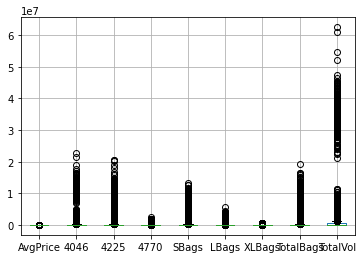

In [27]:
data.boxplot()

##### 3.5.1. Distribution of AvgPrice <a class="anchor" id="section_3_5_1"></a>

Text(0, 0.5, 'Count')

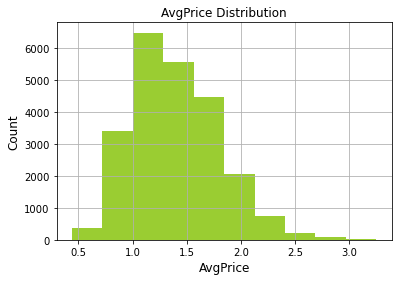

In [28]:
data['AvgPrice'].plot(kind='hist', grid='True', color='yellowgreen')
plt.title('AvgPrice Distribution')
plt.xlabel('AvgPrice', fontsize=12)
plt.ylabel('Count', fontsize=12)

##### 3.5.2. Distribution of 4046 <a class="anchor" id="section_3_5_2"></a>

Text(0, 0.5, 'Count')

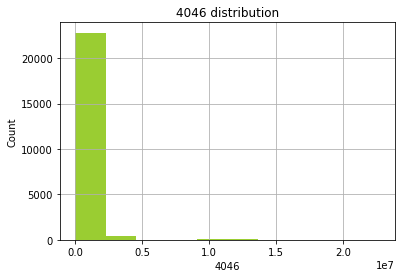

In [29]:
data['4046'].plot(kind='hist', title='4046 distribution', grid='True', color='yellowgreen')
plt.xlabel('4046')
plt.ylabel('Count')

##### 3.5.3. Distribution of 4225 <a class="anchor" id="section_3_5_3"></a>

Text(0, 0.5, 'Count')

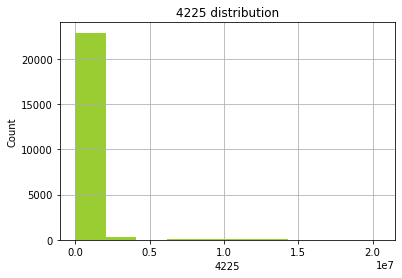

In [30]:
data['4225'].plot(kind='hist', title='4225 distribution', grid='True', color='yellowgreen')
plt.xlabel('4225')
plt.ylabel('Count')

##### 3.5.4. Distribution of 4770 <a class="anchor" id="section_3_5_4"></a>

Text(0, 0.5, 'Count')

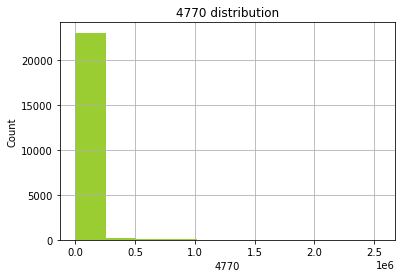

In [31]:
data['4770'].plot(kind='hist', title='4770 distribution', grid='True', color='yellowgreen')
plt.xlabel('4770')
plt.ylabel('Count')

##### 3.5.5. Distribution of SBags <a class="anchor" id="section_3_5_5"></a>

Text(0, 0.5, 'Count')

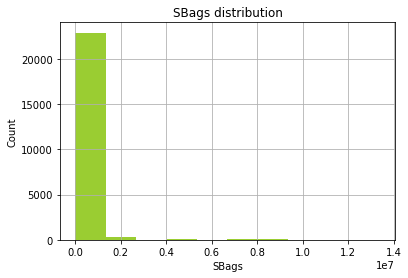

In [32]:
data['SBags'].plot(kind='hist', title='SBags distribution', grid='True', color='yellowgreen')
plt.xlabel('SBags')
plt.ylabel('Count')

##### 3.5.6. Distribution of LBags <a class="anchor" id="section_3_5_6"></a>

Text(0, 0.5, 'Count')

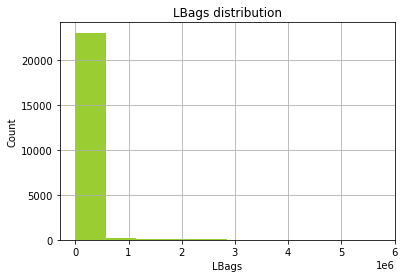

In [33]:
data['LBags'].plot(kind='hist', title='LBags distribution', grid='True', color='yellowgreen')
plt.xlabel('LBags')
plt.ylabel('Count')

##### 3.5.7. Distribution of XLBags <a class="anchor" id="section_3_5_7"></a>

Text(0, 0.5, 'Count')

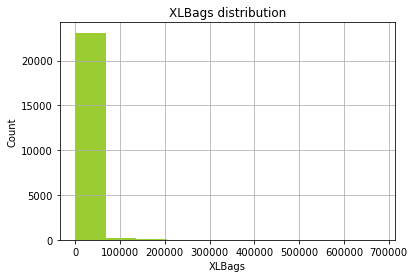

In [34]:
data['XLBags'].plot(kind='hist', title='XLBags distribution', grid='True', color='yellowgreen')
plt.xlabel('XLBags')
plt.ylabel('Count')

##### 3.5.8. Distribution of TotalBags <a class="anchor" id="section_3_5_8"></a>

Text(0, 0.5, 'Count')

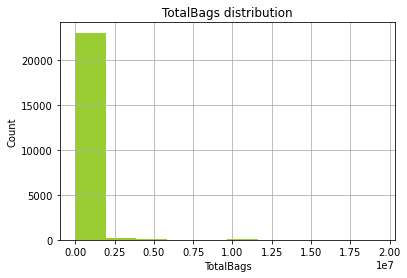

In [35]:
data['TotalBags'].plot(kind='hist', title='TotalBags distribution', grid='True', color='yellowgreen')
plt.xlabel('TotalBags')
plt.ylabel('Count')

##### 3.5.9. Distribution of TotalVol <a class="anchor" id="section_3_5_9"></a>

Text(0, 0.5, 'Count')

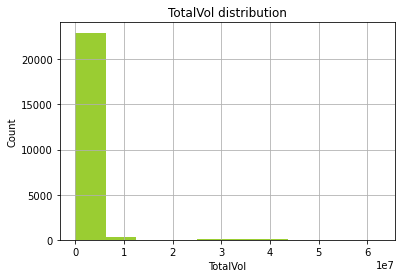

In [36]:
data['TotalVol'].plot(kind='hist', title='TotalVol distribution', grid='True', color='yellowgreen')
plt.xlabel('TotalVol')
plt.ylabel('Count')

#### 3.6. Dummy variables <a class="anchor" id="section_3_6"></a>

In [37]:
data = pd.get_dummies(data, columns=['Type'], prefix='Type', prefix_sep='.')

## Chapter 4: EDA <a class="anchor" id="chapter04"></a>


In [2]:
file = open('avocado.csv')
df_ = pd.read_csv('avocado.csv')

NameError: name 'pd' is not defined

In [3]:
df_

NameError: name 'df_' is not defined

#### 4.1. Correlation plot <a class="anchor" id="section_4_1"></a>

In [ ]:
corre = df_.corr()
sns.heatmap(corre, cmap='Greens')

In [ ]:
X = df_[['AvgPrice','4046','4225','4770','SBags','LBags','XLBags','TotalBags','Type.Conventional','Type.Organic']]
y = df_[['TotalVol']]

In [1]:
import statsmodels.api as sm
reg = sm.OLS(y, X).fit()
reg.summary()

NameError: name 'y' is not defined

## Chapter 5: Spatial analysis <a class="anchor" id="chapter05"></a>


## Chapter 6: Temporal analysis <a class="anchor" id="chapter06"></a>


In [ ]:
options = ['New York']
dfny = df_[df_['Region'].isin(options)]

In [ ]:
import plotly.express as px

fig = px.line(df_, x='Date', y="AvgPrice")
fig.show()

In [ ]:
import plotly.express as px

fig = px.line(df_, x='Date', y=["AvgPrice"])
fig.show()

In [ ]:
fig = px.line(df_, x='Date', y=["TotalVol"])
fig.show()

In [ ]:
fig = px.line(df_, x='Date', y=["4046"])
fig.show()

In [ ]:
X = df_[['AvgPrice']]
y = df_[['D']]

In [ ]:
plt.plot(X,y)

In [ ]:
country_geo = df_['Region']
plot_data = df_[['Region','TotalVol']]

In [ ]:
import json
usa_states = json.load(open("map.geojson"))

In [ ]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [ ]:
fig = px.choropleth()

In [ ]:
datan = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        locations = "New York":"NY",
        locationmode = "USA-states",
        z = df_['AvgPrice'],
        text = df_['AvgPrice'],
        colorbar = {'title' : 'Average price of avocados'})

In [ ]:
layout = dict(title = 'AvgPrice of avocados',
              geo = {'scope':'usa'})

In [ ]:
choromap = go.Figure(datan,layout = layout)
iplot(choromap,validate=False)

In [ ]:
fig = px.choropleth(df_, locations='TotalVol', color='AvgPrice')
fig.show()

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df_['TotalVol'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

In [ ]:
plt.plot(df.Date, df.AvgPrice)
plt.xticks(rotation=90)
plt.show()

In [ ]:
result = adfuller(df.TotalVol.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])